<a href="https://colab.research.google.com/github/Notfamousyet/DataScience/blob/main/DiwaliSalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('/content/Diwali Sales Data.csv', encoding='latin-1')
df.shape

(11251, 15)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
# check null values
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [11]:
# prompt: delete null value rows from amount column

# Drop rows with null values in the 'Amount' column
df.dropna(subset=['Amount'], inplace=True)


In [12]:
df.shape

(11239, 15)

In [14]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [15]:
# drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)


In [16]:
df.shape

(11239, 13)

In [22]:
# check unique values of userid values number

print(df['User_ID'].nunique())
print(df['Product_ID'].nunique())
print(df['Cust_name'].nunique())

3752
2350
1250


In [28]:


# Check for duplicate rows across all columns
duplicate_rows = df[df.duplicated(keep=False)]

# If you want to see all values of the duplicate rows
duplicate_rows



,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
18,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
19,1001883,Praneet,P00029842,M,51-55,54,1,Uttar Pradesh,Central,Hospitality,Auto,1,23568.0
4403,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
4404,1004725,Jackson,P00150842,F,36-45,37,1,Maharashtra,Western,Hospitality,Electronics & Gadgets,4,9859.0
5702,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5703,1003208,Bowman,P00171642,F,26-35,31,0,Bihar,Eastern,Agriculture,Electronics & Gadgets,4,8088.0
5907,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
5908,1001260,Dheeraj,P00344042,M,26-35,28,0,Maharashtra,Western,IT Sector,Electronics & Gadgets,4,8015.0
6172,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0
6173,1001325,Reese,P00111742,F,26-35,27,1,Gujarat,Western,Construction,Electronics & Gadgets,3,7923.0


In [29]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Print the shape of the DataFrame to confirm the rows have been removed
df.shape


(11231, 13)

In [30]:
df['Amount']=df['Amount'].astype('int')

In [33]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11231.000000,11231.000000,11231.000000
mean,35.411985,2.489093,9454.084676
std,12.756116,1.114880,5221.728074
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12677.500000
max,92.000000,4.000000,23952.000000


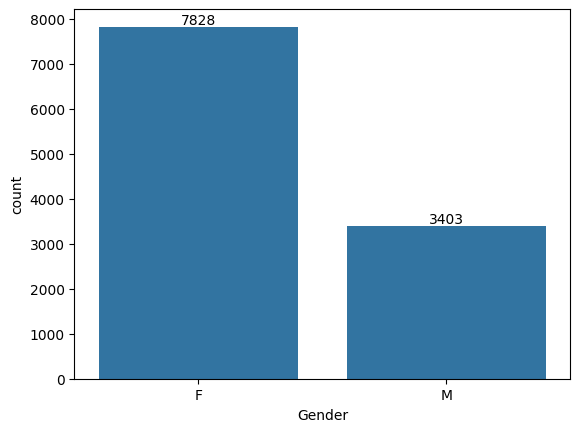

In [34]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

Gender
F    74307679
M    31871146
Name: Amount, dtype: int64


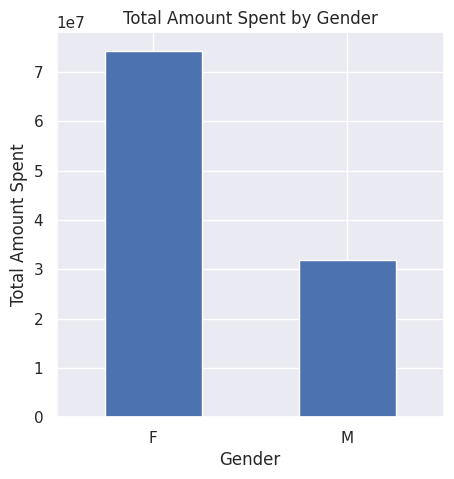

In [72]:
gender_spending = df.groupby('Gender')['Amount'].sum()

print(gender_spending)
plt.figure(figsize=(5,5))
gender_spending.plot(kind='bar', rot=0)
plt.xlabel("Gender")
plt.ylabel("Total Amount Spent")
plt.title("Total Amount Spent by Gender")
plt.show()

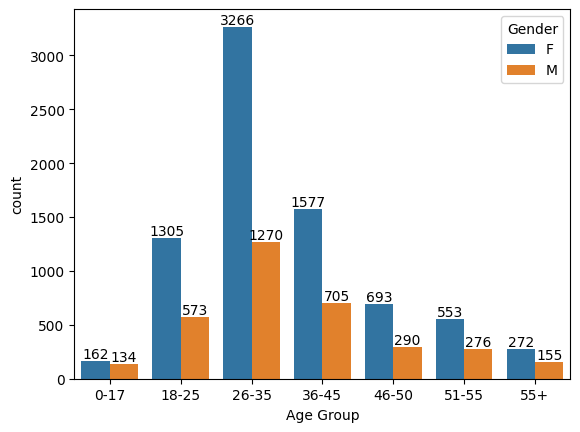

In [41]:
# Define the desired order of Age Group categories
age_group_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Create the countplot with the specified order
ax = sns.countplot(data=df, x='Age Group', hue='Gender', order=age_group_order)

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)


In [44]:
# all unique values of column state

print(df['State'].unique())


['Maharashtra' 'Andhra\xa0Pradesh' 'UP' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Jharkhand' 'Kerala' 'Haryana' 'MP' 'Bihar'
 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']


In [48]:
# replace value in table for column like if uttar pradesh have to replace up and so on for all maharashtra mh all values of state in 2-3 char

# Create a dictionary to map state names to their abbreviations
state_mapping = {
    'Uttar Pradesh': 'UP',
    'Maharashtra': 'MH',
    'Karnataka': 'KA',
    'Delhi': 'DL',
    'Andhra\xa0Pradesh':'AP',
    'Gujarat':'GJ',
    'Telangana':'TN',
    'Rajasthan':'RJ',
    'Himachal Pradesh':'HP',
    'Punjab':'PB',
    'Haryana':'HR',
    'Uttarakhand':'UK',


}

# Replace state names with abbreviations in the 'State' column
df['State'] = df['State'].replace(state_mapping)

# Display the updated DataFrame (optional)
print(df.head())


   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status State  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0    MH   
1  1000732     Kartik  P00110942      F     26-35   35               1    AP   
2  1001990      Bindu  P00118542      F     26-35   35               1    UP   
3  1001425     Sudevi  P00237842      M      0-17   16               0    KA   
4  1000588       Joni  P00057942      M     26-35   28               1    GJ   

       Zone       Occupation Product_Category  Orders  Amount  
0   Western       Healthcare             Auto       1   23952  
1  Southern             Govt             Auto       3   23934  
2   Central       Automobile             Auto       3   23924  
3  Southern     Construction             Auto       2   23912  
4   Western  Food Processing             Auto       2   23877  


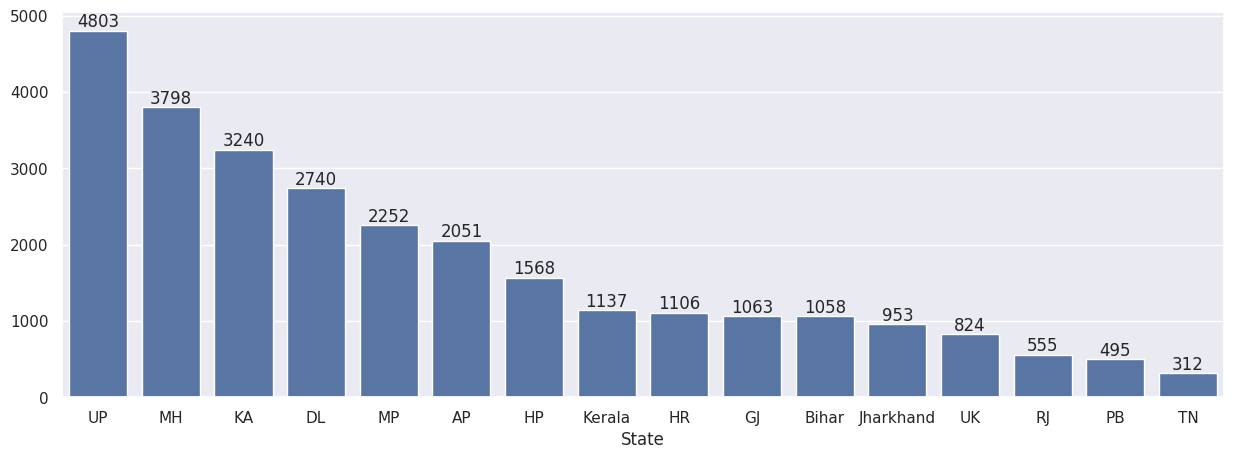

In [54]:
# groupby state sort by orders and barplot

state_orders = df.groupby('State')['Orders'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax=sns.barplot(x=state_orders.index, y=state_orders.values)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


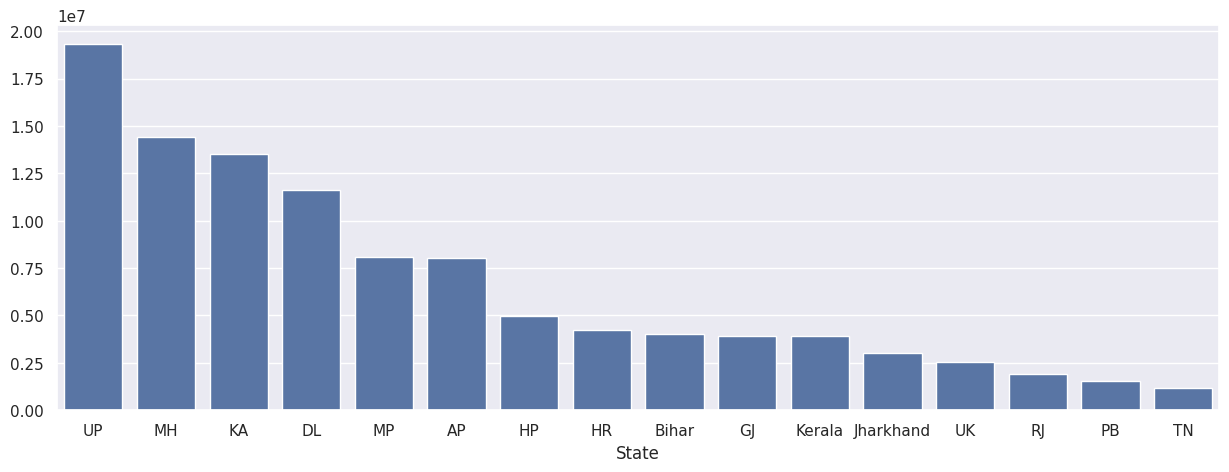

In [56]:
state_spend=df.groupby('State')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,5))
ax=sns.barplot(x=state_spend.index,y=state_spend.values)
plt.show()

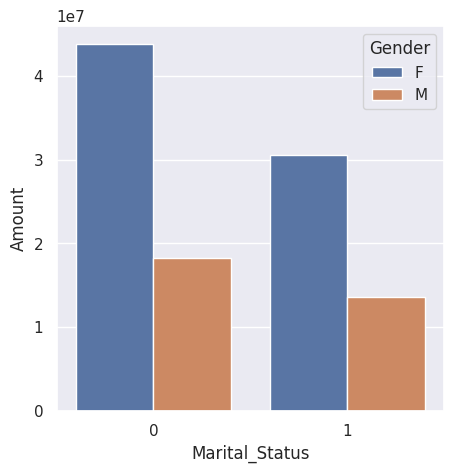

In [59]:
sales_mr=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data=sales_mr,x='Marital_Status',y='Amount',hue='Gender')
plt.show()

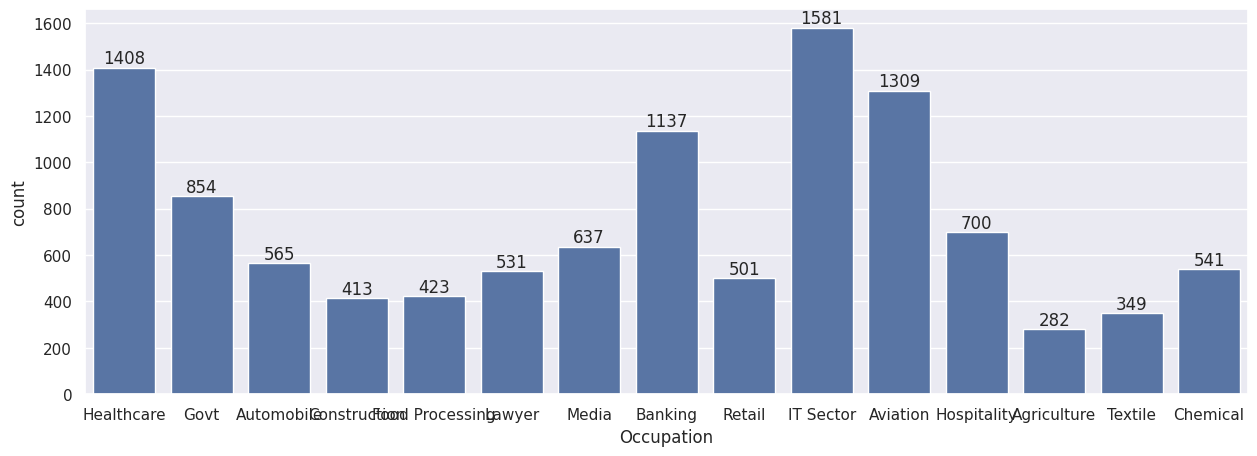

In [60]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

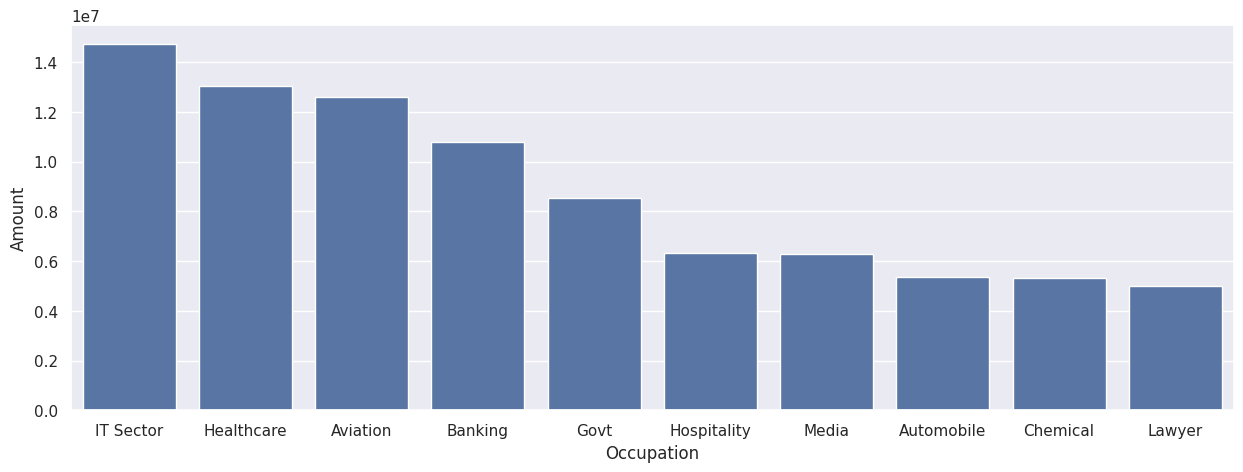

In [62]:
sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state,x='Occupation',y='Amount')
plt.show()


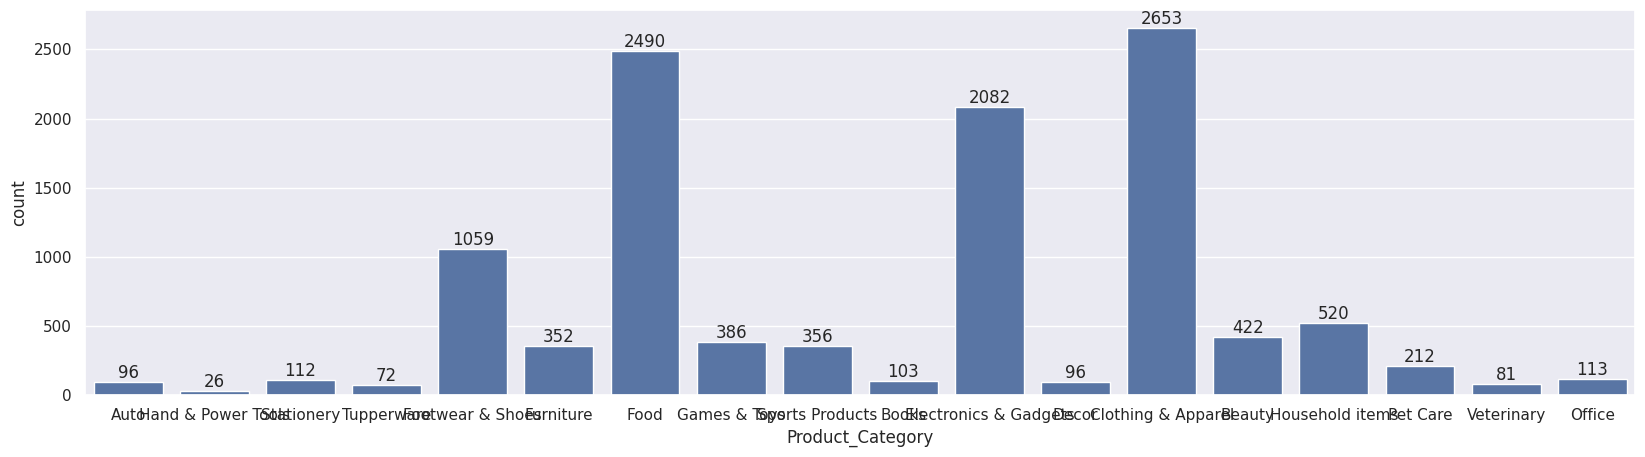

In [67]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

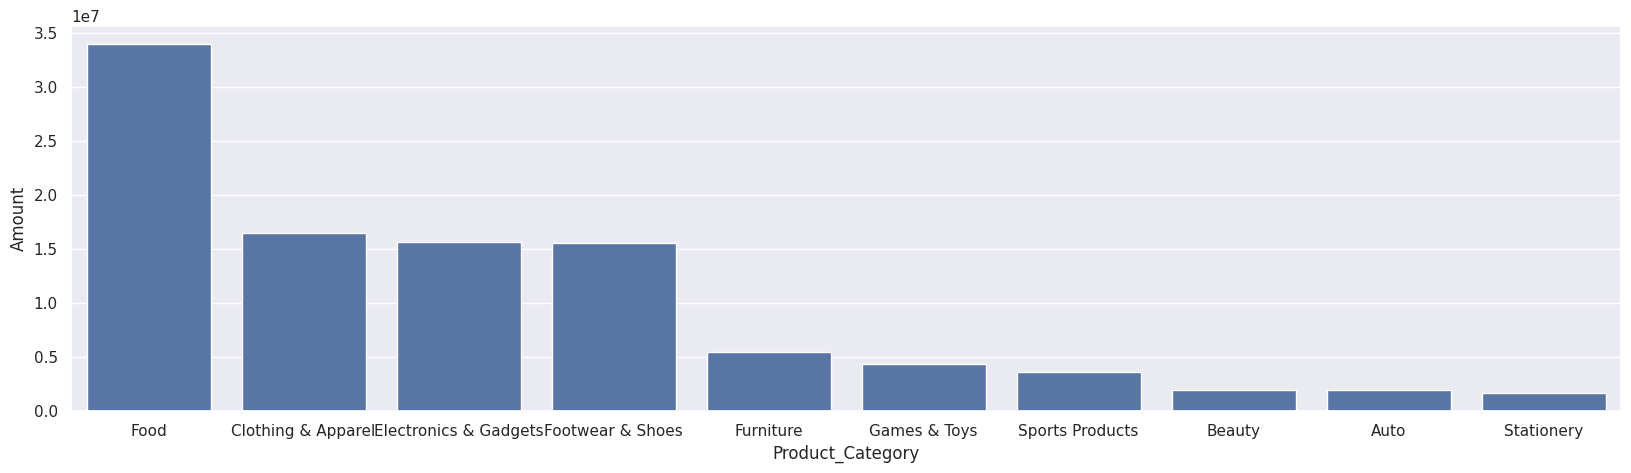

In [68]:
sales_state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_Category',y='Amount')
plt.show()

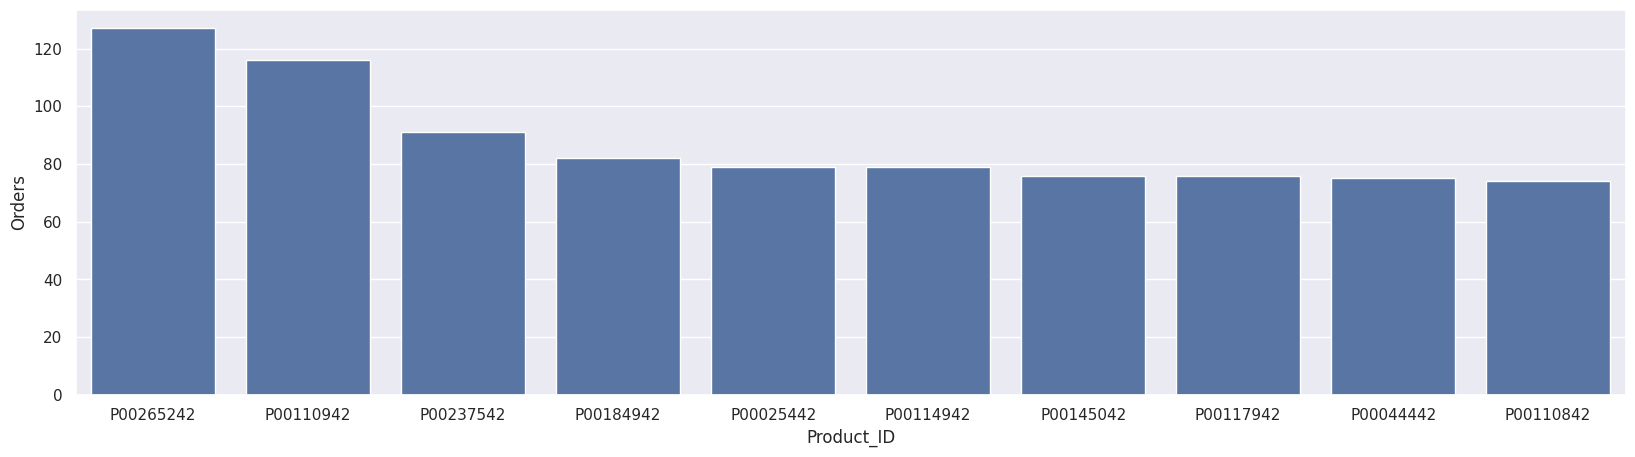

In [69]:
sales_state=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state,x='Product_ID',y='Orders')
plt.show()